In [1]:
%load_ext autoreload
%autoreload 2

In [381]:
from eq import *
from copy import deepcopy

In [24]:
distortion = (1.84 - 1.19)/1.19

In [382]:
params_foo = {
'aH': 1,
'aL': .05,
'y': .11,
'c': .05,
'b': .025,
'delta': .007,
'sigma': .1,
'r': .04,
'B': .7,
'precision': .01,
'bias': 0
}

foo = Equilibrium(**params_foo)
_ = foo.equilibrium(5)

params_bar = deepcopy(params_foo)
params_bar['bias'] = 0.55

bar = Equilibrium(**params)
_ = bar.equilibrium(5)

In [375]:
foo.belief_tree.get_amounts('employed'), foo.belief_tree.get_amounts('unemployed')

(array([ 0.05910233,  0.43233295]), array([ 0.19094003,  0.06609808]))

In [376]:
bar.belief_tree.get_amounts('employed'), bar.belief_tree.get_amounts('unemployed')

(array([ 0.06038119,  0.43289064]), array([ 0.19061599,  0.06554537]))

In [371]:
sns.set(font = 'serif')
sns.set(font = 'serif', style = 'whitegrid')

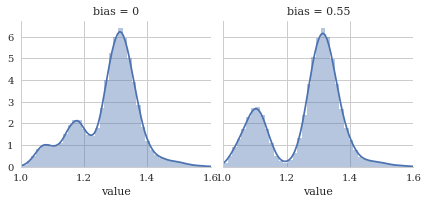

In [377]:
d = pd.DataFrame({ '{}'.format(np.round(distortion, 2)): bar.get_wage_distribution(), '0': foo.get_wage_distribution()})
d = d.melt().rename(columns = {'variable': 'bias'})
d = d[(d > 0) & (d < 2)] # just filters out the random oddities from rng and inversion
g = sns.FacetGrid(d, col = 'bias')
g.map(sns.distplot, 'value').set(xlim = (1.0, 1.6)).savefig('wage-distributions.pdf')

In [293]:
g = None

(0.040781598878776699,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f69e827fe48>)

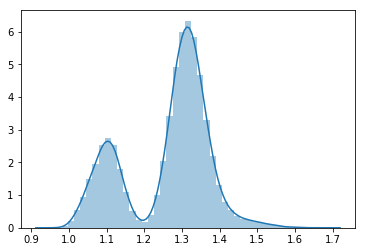

In [253]:
a = bar.get_wage_distribution()
bar.get_gini(), sns.distplot(a, bins = 45)

In [208]:
d = {k:v for k,v in bar._get_wages('L')}
wages, probs = list(d.keys()), list(d.values())
probs = probs/sum(probs)
a = np.random.choice(wages, 100000, p = probs)
gini(a)

0.028674961710583383

In [209]:
d = {k:v for k,v in foo._get_wages('L')}
wages, probs = list(d.keys()), list(d.values())
probs = probs/sum(probs)
a = np.random.choice(wages, 100000, p = probs)
gini(a)

0.03464446975765112

In [398]:
from statsmodels.iolib.summary2 import _df_to_simpletable

_ = pd.DataFrame([params_foo, params_bar], index = ['Group B', 'Group A'])

print(_df_to_simpletable(_.T, float_format='%.2f').as_latex_tabular())

\begin{center}
\begin{tabular}{lcc}
\hline
          & Group B & Group A  \\
\hline
\hline
\end{tabular}
\begin{tabular}{lrr}
B         &    0.70 &    0.70  \\
aH        &    1.00 &    1.00  \\
aL        &    0.05 &    0.05  \\
b         &    0.03 &    0.03  \\
bias      &    0.00 &    0.55  \\
c         &    0.05 &    0.05  \\
delta     &    0.01 &    0.01  \\
precision &    0.01 &    0.01  \\
r         &    0.04 &    0.04  \\
sigma     &    0.10 &    0.10  \\
y         &    0.11 &    0.11  \\
\hline
\end{tabular}
\end{center}


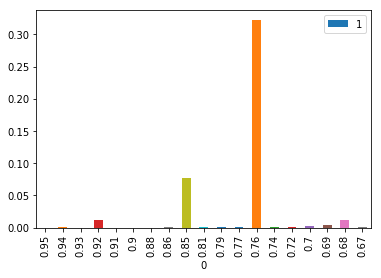

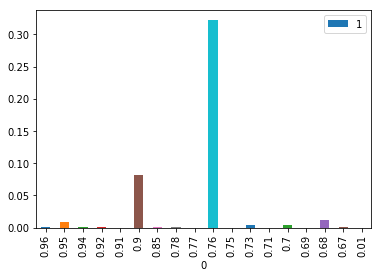

In [28]:
foo.plot_wages('H')
bar.plot_wages('H')

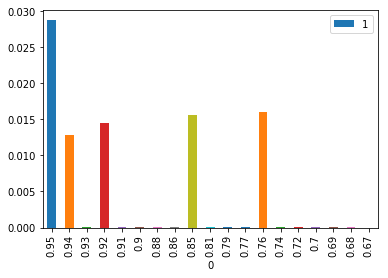

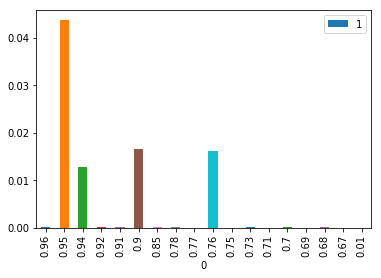

In [29]:
foo.plot_wages('L')
bar.plot_wages('L')

In [ ]:
foo.belief_tree

In [22]:
bar.belief_tree

|--m: 0.53, u: 0.1000, e: 0.0000 
   |--m: 0.11, u: 0.0541, e: 0.0000 
      |--m: 0.04, u: 0.0381, e: 0.0000 
         |--m: 0.05, u: 0.0319, e: 0.0000 
            |--m: 0.05, u: 0.0273, e: 0.0000 
               |--m: 0.05, u: 0.0234, e: 0.0000 
                  |--m: 0.05, u: 0.0201, e: 0.0000 
                     |--m: 0.05, u: 0.0172, e: 0.0000 
                     |--m: 0.05, u: 0.0001, e: 0.0081 
                  |--m: 0.05, u: 0.0001, e: 0.0094 
                     |--m: 0.05, u: 0.0001, e: 0.0000 
               |--m: 0.03, u: 0.0001, e: 0.0110 
                  |--m: 0.05, u: 0.0001, e: 0.0000 
                     |--m: 0.05, u: 0.0001, e: 0.0000 
            |--m: 0.11, u: 0.0001, e: 0.0129 
               |--m: 0.04, u: 0.0001, e: 0.0000 
                  |--m: 0.05, u: 0.0001, e: 0.0000 
                     |--m: 0.05, u: 0.0001, e: 0.0000 
         |--m: -0.27, u: 0.0001, e: 0.0222 
            |--m: -0.26, u: 0.0001, e: 0.0000 
               |--m: -0.26, u: 0.